### Import Packages

In [2]:
""" Import python package """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Preprocessing Dataset

In [3]:
""" Import python packages for dataset """
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

""" Import actual Kaggle House Prices Dataset """
train_data = pd.read_csv('./train.csv')
print(train_data.shape[0])

data = train_data

### instead of dropping columns with mainly numerical and some NA, replace NA with mean
mean_values = data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].mean()
data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']] = data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].fillna(mean_values)
### alternatively just drop the columns
# data.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)

### columns with over 700 NA rows (out of 1400 rows):
data.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
                    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
""" for columns like LotFrontage, GarageYrBlt, MasVnrArea that have mostly numerical values,
    but a few NA values we have a few options to compare accuracy between
    1) delete these rows using data.dropna(axis=0)
    2) replace NAs with 0
    3) replace NAs with average
    4) one hot encode this column (GarageYrBlt currently one hot encoded?)
    5) delete that column

    should probably delete columns that are mostly NA but we can test difference
"""

# One-hot encode the categorical columns
encoded_categorical_cols = pd.get_dummies(data[categorical_cols], columns=categorical_cols)

# Drop the original categorical columns from data_encoded
data_encoded = data.drop(columns=categorical_cols)
print("shape after dropping:", data_encoded.shape[1])

# Concatenate data_encoded with the encoded_categorical_cols
data_encoded = pd.concat([data_encoded, encoded_categorical_cols], axis=1)
print("shape after concatenating:", data_encoded.shape[1])

Y = data_encoded["SalePrice"] # target
X = data_encoded.drop(columns=["SalePrice"])
# print(X, Y)

1460
shape after dropping: 38
shape after concatenating: 271


In [6]:
x_original_train, x_original_test, y_original_train, y_original_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

### Replicate preprocessing for the testing data

In [7]:
test_data = pd.read_csv('./test.csv')
print(test_data.shape[0])

### instead of dropping columns with mainly numerical and some NA, replace NA with mean
test_mean_values = test_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].mean()
test_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']] = test_data[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].fillna(mean_values)
### alternatively just drop the columns
# test_data.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)

### columns with over 700 NA rows (out of 1400 rows):
test_data.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

# One-hot encode the categorical columns
encoded_categorical_cols_test = pd.get_dummies(test_data[categorical_cols], columns=categorical_cols)

# Drop the original categorical columns from data_encoded
test_data_encoded = test_data.drop(columns=categorical_cols)
print("shape after dropping:", data_encoded.shape[1])
test_X = test_data_encoded

1459
shape after dropping: 271


## PCA

#### First figure out how many principal components would be optimal by analyzing the explained variance ratio for each

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming scaled_X contains your scaled data
'''' here un comment the code below to see the explained variance ratio for different number of components  -- - - - - - - - - - - - -  - -'''
# # First use the sklearn standardization method
# scaler = StandardScaler()
# scaled_X = scaler.fit_transform(X)

# # scaling y (optional, but probably advised since this is a regression model)
# scaler_y = StandardScaler()
# y_array = Y.values.reshape(-1, 1)
# scaled_y_array = scaler_y.fit_transform(y_array)
# scaled_Y = pd.Series(scaled_y_array.ravel(), index=Y.index) # Convert scaled_y back to a pandas Series if needed

# # Visualize explained variance ratio for different number of components
# plt.figure(figsize=(10, 5))

# for p in range(1, 21):  # Try different values of p
#     pca = PCA(n_components=p)
#     pca.fit(scaled_X)
#     plt.plot(range(1, p + 1), pca.explained_variance_ratio_, label=f'p={p}')

# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance Ratio for Different Number of Components')
# # plt.legend()
# plt.show()

# # Visualize cumulative explained variance ratio
# plt.figure(figsize=(10, 5))

# for p in range(1, 101):  # Try different values of p
#     pca = PCA(n_components=p)
#     pca.fit(scaled_X)
#     cumsum_variance = pca.explained_variance_ratio_.cumsum()
#     plt.plot(range(1, p + 1), cumsum_variance, label=f'p={p}')

# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance Ratio')
# plt.title('Cumulative Explained Variance Ratio for Different Number of Components')
# # plt.legend()
# plt.show()

"' here un comment the code below to see the explained variance ratio for different number of components  -- - - - - - - - - - - - -  - -"

In [9]:
### should we be able to just upload this from the file structure on the left?

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# first use the sklearn standardization method
# then apply PCA
pca = PCA(n_components=8)              # choose a p value of 10 / if drop to 2 then you can plot with target value as colors of dots
pca.fit(scaled_X)                       # I THINK THIS LINE SHOULD BE BELOW THE NEXT ONE
scaled_X = pca.transform(scaled_X)
# print(pca.explained_variance_ratio_)
# print(pca.singular_values_)

# then try model on normal data and then pca data and see about the difference
# each new feature is a combination of old features
# which eigenvalues have the highest magnitude - are they intuitive to be chosen?

# can plot and see if you can visually differentiate them based on target based on PCA result

### PCA Data Analysis

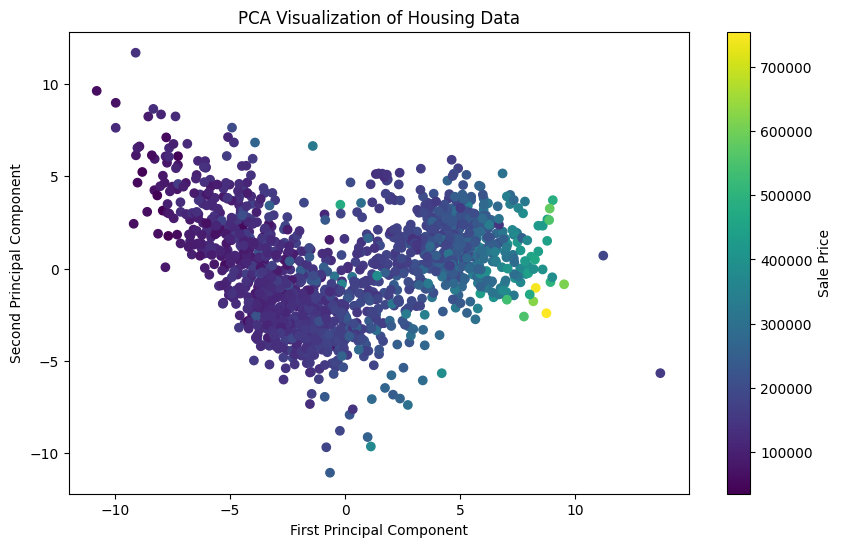

Feature associated with principal component number  1 is:  YearBuilt
Feature associated with principal component number  2 is:  Foundation_CBlock
Feature associated with principal component number  3 is:  GrLivArea
Feature associated with principal component number  4 is:  2ndFlrSF
Feature associated with principal component number  5 is:  MSSubClass
Feature associated with principal component number  6 is:  BldgType_1Fam
Feature associated with principal component number  7 is:  BldgType_Duplex
Feature associated with principal component number  8 is:  SaleCondition_Normal


In [10]:
# which eigenvalues have the highest magnitude - are they intuitive to be chosen?
# can plot and see if you can visually differentiate them based on target based on PCA result

# Plotting the transformed data in 2D
plt.figure(figsize=(10, 6))
plt.scatter(scaled_X[:, 0], scaled_X[:, 1], c=Y, cmap='viridis')
plt.colorbar(label='Sale Price')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Visualization of Housing Data')
plt.show()

# Assuming pca is your fitted PCA object
# The components_ attribute contains the principal axes in feature space
principal_components = pca.components_

# Feature names from your original dataset (assuming X is your original dataset)
feature_names = X.columns

for i in range(len(principal_components)):
  print("Feature associated with principal component number ", i+1, "is: ", feature_names[np.argmax(np.abs(principal_components[i]))])

In [11]:
""" Split PCA Processed Data into Train and test Data """
# train_test_split function from sklearn randomly split the input and output data to train and test datasets with test_size ratio
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.3, shuffle=True)

print(x_train.shape[1])
print(x_test.shape[1])

8
8


### Support Vector Machine

In [12]:
""" Import SVM package """
from sklearn.svm import SVR           # Using Kernel for non binary, Higher Dimensions
from sklearn.svm import LinearSVR     # Linear SVR provides a faster implementation than SVR, BUT ONLY CONSIDER LINEAR KERNEL
from sklearn.svm import NuSVR         # Nu Support Vector Regression,  uses a parameter nu to control the number of support vectors

### Test Model - PCA

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR           # Using Kernel for non binary, Higher Dimensions
from sklearn.svm import LinearSVR     # Linear SVR provides a faster implementation than SVR, BUT ONLY CONSIDER LINEAR KERNEL

param = {
    'C' : [1, 5, 10, 100],
    'degree' : [0, 3, 8],
    'coef0' : [0, 0.01, 10, 0.5],
    'gamma' : ('auto','scale', 0.01, 0.10, 1)
}

Poly_SVR_Model = SVR(kernel= 'poly')

grids = GridSearchCV(estimator = Poly_SVR_Model, 
                     param_grid = param, 
                     cv = 5)

grids.fit(x_train, y_train)

grids.cv_results_, grids.best_params_, grids.best_score_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR           # Using Kernel for non binary, Higher Dimensions
from sklearn.svm import LinearSVR     # Linear SVR provides a faster implementation than SVR, BUT ONLY CONSIDER LINEAR KERNEL

param = {
    'C' : [150, 200],
    'degree' : [3, 5],
    'coef0' : [10, 15],
    'gamma' : ['auto','scale', 0.01, 0.10]
    
}

Poly_SVR_Model = SVR(kernel= 'poly')

grids = GridSearchCV(estimator = Poly_SVR_Model, 
                     param_grid = param, 
                     cv = 5)

grids.fit(x_train, y_train)

grids.cv_results_, grids.best_params_, grids.best_score_

In [ ]:
'C': [10, 100, 150, 200, 1000],
'gamma':['auto', 'scale', 0.0001, 0.001, 0.01],
'degree' : [3, 5, 8],
'coef0' : [0.01, 0.1, 1, 10, 25, 50, 100]

In [13]:
""" """
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Need some parameter Tunings
Linear_SVR_Model = SVR(kernel= 'linear', C=100, gamma='auto')
RBF_SVR_Model = SVR(kernel='rbf', C = 100, gamma=0.10, epsilon=0.1)                        # RBF (Radial Basis Function) Kernel has two parameters: C and Gamma
Poly_SVR_Model = SVR(kernel='poly', C=100, gamma=0.1, degree=3, epsilon=.1, coef0=1)
Gaussian_SVR_Model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
 
Linear_SVR_Model.fit(x_train, y_train)
RBF_SVR_Model.fit(x_train, y_train)
Poly_SVR_Model.fit(x_train, y_train)

# Score function gets R - Squared score: (1 - u\v), u = ((y_true - y_pred)** 2).sum(), v = ((y_true - y_true.mean()) ** 2).sum()
linear_score = Linear_SVR_Model.score(x_test, y_test)
rbf_score = RBF_SVR_Model.score(x_test, y_test)
poly_score = Poly_SVR_Model.score(x_test, y_test)

print("Linear SVR R-Squared Score: ", linear_score)
print("RBF SVR R-Squared Score: ", rbf_score)
print("POLY SVR R-Squared Score: ", poly_score)
print("\n")

# get prediction result from both models
linear_y_predict = Linear_SVR_Model.predict(x_test)
rbf_y_predict = RBF_SVR_Model.predict(x_test)
poly_y_predict = Poly_SVR_Model.predict(x_test)

""" Calculate result matrics """
linear_mse = mean_squared_error(y_test, linear_y_predict)
linear_mae = mean_absolute_error(y_test, linear_y_predict)
lienar_mape = mean_absolute_percentage_error(y_test, linear_y_predict)

rbf_mse = mean_squared_error(y_test, rbf_y_predict)
rbf_mae = mean_absolute_error(y_test, rbf_y_predict)
rbf_mape = mean_absolute_percentage_error(y_test, rbf_y_predict)

poly_mse = mean_squared_error(y_test, poly_y_predict)
poly_mae = mean_absolute_error(y_test, poly_y_predict)
poly_mape = mean_absolute_percentage_error(y_test, poly_y_predict)

print("-------------------- Linear SVR MODEL ---------------------")
print("Linear Mean Squared Error : ", linear_mse)
print("Linear Mean Absolute Error : ", linear_mae)
print("Linear SVR Mean Absolute Percentage Error : ", lienar_mape)

print("-------------------- RBF SVR MODEL ---------------------")
print("RBF Mean Squared Error : ", rbf_mse)
print("RBF Mean Absolute Error : ", rbf_mae)
print("RBF SVR Mean Absolute Percentage Error : ", rbf_mape)

print("-------------------- POLY SVR MODEL ---------------------")
print("RBF Mean Squared Error : ", poly_mse)
print("RBF Mean Absolute Error : ", poly_mae)
print("RBF SVR Mean Absolute Percentage Error : ", poly_mape)


Linear SVR R-Squared Score:  0.7540017560393074
RBF SVR R-Squared Score:  -0.03487016218776029
POLY SVR R-Squared Score:  0.49299178390912957


-------------------- Linear SVR MODEL ---------------------
Linear Mean Squared Error :  1663989500.3489945
Linear Mean Absolute Error :  21964.155989232248
Linear SVR Mean Absolute Percentage Error :  0.12356703977298011
-------------------- RBF SVR MODEL ---------------------
RBF Mean Squared Error :  7000103156.752818
RBF Mean Absolute Error :  56796.42957481844
RBF SVR Mean Absolute Percentage Error :  0.3163809851721741
-------------------- POLY SVR MODEL ---------------------
RBF Mean Squared Error :  3429521831.467578
RBF Mean Absolute Error :  22065.895637895435
RBF SVR Mean Absolute Percentage Error :  0.13614353080047056


### Test Model - Original

NameError: name 'x_original_train' is not defined

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Need some parameter Tunings
Original_Linear_SVR_Model = SVR(kernel= 'linear', C=100, gamma='auto')
Original_RBF_SVR_Model = SVR(kernel='rbf', C = 100, gamma='scale', epsilon=0.1)                        # RBF (Radial Basis Function) Kernel has two parameters: C and Gamma
Original_Poly_SVR_Model = SVR(kernel='poly', C=100, gamma=0.1, degree=3, epsilon=.1, coef0=1)

Original_Linear_SVR_Model.fit(x_original_train, y_original_train)
Original_RBF_SVR_Model.fit(x_original_train, y_original_train)
Original_Poly_SVR_Model.fit(x_original_train, y_original_train)

Original_linear_score = Original_Linear_SVR_Model.score(x_original_train, y_original_train)
Original_rbf_score = Original_RBF_SVR_Model.score(x_original_train, y_original_train)
Original_poly_score = Original_Poly_SVR_Model.score(x_original_train, y_original_train)

print("Original Linear SVR R-Squared Score: ", Original_linear_score)
print("Original RBF SVR R-Squared Score: ", Original_rbf_score)
print("Original Poly SVR R-Squared Score: \n", Original_poly_score)

# get prediction result from both models
Original_linear_y_predict = Original_Linear_SVR_Model.predict(x_original_test)
Original_rbf_y_predict = Original_RBF_SVR_Model.predict(x_original_test)
Original_poly_y_predict = Original_Poly_SVR_Model.predict(x_original_test)

""" Calculate result matrics """
Original_linear_mse = mean_squared_error(y_original_test, Original_linear_y_predict)
Original_linear_mae = mean_absolute_error(y_original_test, Original_rbf_y_predict)
Original_lienar_mape = mean_absolute_percentage_error(y_original_test, Original_poly_y_predict)

Original_rbf_mse = mean_squared_error(y_original_test, Original_rbf_y_predict)
Original_rbf_mae = mean_absolute_error(y_original_test, Original_rbf_y_predict)
Original_rbf_mape = mean_absolute_percentage_error(y_original_test, Original_rbf_y_predict)

Original_poly_mse = mean_squared_error(y_original_test, Original_poly_y_predict)
Original_poly_mae = mean_absolute_error(y_original_test, Original_poly_y_predict)
Original_poly_mape = mean_absolute_percentage_error(y_original_test, Original_poly_y_predict)

print("-------------------- Linear SVR MODEL ---------------------")
print("Linear Mean Squared Error : ", Original_linear_mse)
print("Linear Mean Absolute Error : ", Original_linear_mae)
print("Linear SVR Mean Absolute Percentage Error : ", Original_lienar_mape)

print("-------------------- RBF SVR MODEL ---------------------")
print("RBF Mean Squared Error : ", Original_rbf_mse)
print("RBF Mean Absolute Error : ", Original_rbf_mae)
print("RBF SVR Mean Absolute Percentage Error : ", Original_rbf_mape)

print("-------------------- Poly SVR MODEL ---------------------")
print("Linear Mean Squared Error : ", Original_poly_mse)
print("Linear Mean Absolute Error : ", Original_poly_mae)
print("Linear SVR Mean Absolute Percentage Error : ", Original_poly_mape)

In [20]:
# linear_score = Linear_SVR_Model.score(X, Y)
# rbf_score = RBF_SVR_Model.score(X, Y)
# print("Linear SVR R-Squared Score: ", linear_score)
# print("RBF SVR R-Squared Score: ", rbf_score)

# # get prediction result from both models
# linear_y_predict = Linear_SVR_Model.predict(x_original_test)
# rbf_y_predict = RBF_SVR_Model.predict(x_original_test)

# """ Calculate result matrics """
# linear_mse = mean_squared_error(y_original_test, linear_y_predict)
# linear_mae = mean_absolute_error(y_original_test, linear_y_predict)
# lienar_mape = mean_absolute_percentage_error(y_original_test, linear_y_predict)

# rbf_mse = mean_squared_error(y_original_test, rbf_y_predict)
# rbf_mae = mean_absolute_error(y_original_test, rbf_y_predict)
# rbf_mape = mean_absolute_percentage_error(y_original_test, rbf_y_predict)

# print("-------------------- Linear SVR MODEL ---------------------")
# print("Linear Mean Squared Error : ", linear_mse)
# print("Linear Mean Absolute Error : ", linear_mae)
# print("Linear SVR Mean Absolute Percentage Error : ", lienar_mape)

# print("-------------------- RBF SVR MODEL ---------------------")
# print("RBF Mean Squared Error : ", rbf_mse)
# print("RBF Mean Absolute Error : ", rbf_mae)
# print("RBF SVR Mean Absolute Percentage Error : ", rbf_mape)

# print("-------------------- Linear SVR MODEL ---------------------")
# print("Linear Mean Squared Error : ", linear_mse)
# print("Linear Mean Absolute Error : ", linear_mae)
# print("Linear SVR Mean Absolute Percentage Error : ", lienar_mape)

# print("-------------------- RBF SVR MODEL ---------------------")
# print("RBF Mean Squared Error : ", rbf_mse)
# print("RBF Mean Absolute Error : ", rbf_mae)
# print("RBF SVR Mean Absolute Percentage Error : ", rbf_mape)

# print("-------------------- POLY SVR MODEL ---------------------")
# print("RBF Mean Squared Error : ", poly_mse)
# print("RBF Mean Absolute Error : ", poly_mae)
# print("RBF SVR Mean Absolute Percentage Error : ", poly_mape)

Linear SVR R-Squared Score:  0.7786039534842095
RBF SVR R-Squared Score:  -0.04281659754132816
-------------------- Linear SVR MODEL ---------------------
Linear Mean Squared Error :  1434136074.301919
Linear Mean Absolute Error :  19175.054727319122
Linear SVR Mean Absolute Percentage Error :  0.1095493740999058
-------------------- RBF SVR MODEL ---------------------
RBF Mean Squared Error :  6412951700.577088
RBF Mean Absolute Error :  53466.602046875094
RBF SVR Mean Absolute Percentage Error :  0.31498518181701646
